In [236]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('ggplot')

### Reading data from the csv file and pre-processing

In [237]:
#path to the csv
cwd = os.getcwd()
sdp = os.path.join(cwd, 'stored_d')
files = os.listdir(sdp)

csv_files = [f for f in files if f.endswith('.csv')]

#gets first csv file from folder
csv_path = os.path.join(sdp, csv_files[0])

df_data = pd.read_csv(csv_path)

df_data.isnull().sum()

#unnecessary columns removal
df_data = df_data.drop(['Unnamed: 3'], axis=1)
df_data = df_data.drop(['#'], axis=1)

# Check the number of null values in each row
for i, row in df_data.iterrows():
    nulls = row.isnull().sum()

    if nulls > 2:
        df_data.drop(i, inplace=True)

df_data.reset_index(drop=True, inplace=True)


#snippet of data
df_data.head(11)


,Coin,Price,1h,24h,7d,30d,24h Volume,Market Cap,FDV,Market Cap / FDV
0,Bitcoin BTC,"$60,916.70",0.2%,0.4%,4.6%,13.6%,"$13,437,616,327","$1,199,173,864,038","$1,278,499,264,093",0.94
1,Ethereum ETH,"$2,920.24",0.1%,0.7%,6.6%,17.1%,"$6,611,704,940","$350,318,711,327","$350,318,711,327",1.00
2,Tether USDT,$0.9995,0.0%,0.0%,0.1%,0.0%,"$16,290,271,602","$110,734,248,044","$110,734,248,044",1.00
3,BNB BNB,$593.89,0.0%,1.3%,0.8%,2.2%,"$729,879,187","$91,328,909,299","$91,328,909,299",1.00
4,Solana SOL,$145.75,0.1%,0.4%,1.0%,16.4%,"$1,485,752,050","$65,290,547,153","$83,821,826,099",0.78
5,USDC USDC,$0.9998,0.0%,0.0%,0.0%,0.0%,"$3,286,596,187","$33,120,049,951","$33,120,152,665",1.00
6,XRP XRP,$0.5072,0.1%,0.9%,4.9%,17.2%,"$440,846,444","$28,057,577,318","$50,676,526,344",0.55
7,Lido Staked Ether STETH,"$2,919.47",0.1%,0.7%,6.6%,17.0%,"$31,070,545","$27,310,361,214","$27,310,361,214",1.00
8,Toncoin TON,$6.85,0.0%,1.9%,18.8%,5.2%,"$406,548,596","$23,773,437,626","$34,946,382,214",0.68
9,Dogecoin DOGE,$0.1439,0.2%,0.4%,11.0%,26.9%,"$557,772,675","$20,709,268,621","$20,709,825,660",1.00


### Summary statistics
This summary statistics code provides a quick overview of some of the key metrics for coins scrapped of coingecko such as:
- Price - current price of the cryptocurrency from the created csv file
- 24h Volume - the trading volume of cryptocurrency over the last 24 hours
- Market Cap - the total market capitalization of coins.
- FDV - (Fully Diluted Valuation) market capitalization of cryptos (assuming tokens are in circulation)
- Market Cap/FDV - how much of the total potential market cap is currently realized

In [238]:
data = df_data.copy() #copy of main data frame
cols = ['Price', '24h Volume', 'Market Cap','FDV','Market Cap / FDV']

#removing $ and % from columns and converting to numerics
for col in cols:
    if data[col].dtype == 'object':  # Check if the column contains string values
        data[col] = data[col].str.replace(r'[\$,%]', '', regex=True)
    
        data[col] = data[col].replace('-', float('Nan')) #replacing - with Nan value
        
        data[col] = data[col].astype(float)
        if '%' in col: #scaling percentage values
            data[col] = data[col] / 100

        
print("Summary statistics\n")
#caclcualting stats for columns
col_stats = data.agg({
    'Price': ['mean', 'median', 'std', 'min', 'max'],
    '24h Volume': ['mean', 'median', 'std', 'min', 'max'],
    'Market Cap': ['mean', 'median', 'std', 'min', 'max'],
    'FDV': ['mean', 'median', 'std', 'min', 'max'],
    'Market Cap / FDV' : ['mean', 'median', 'std', 'min', 'max']
    
})


# Print the summary statistics
col_stats


Summary statistics



,Price,24h Volume,Market Cap,FDV,Market Cap / FDV
mean,1449.747157,5.522423e+08,2.229589e+10,2.634482e+10,0.754184
median,2.255000,6.278424e+07,2.503572e+09,3.677417e+09,0.885000
std,8572.448475,2.216441e+09,1.247689e+11,1.335629e+11,0.285180
min,0.000023,1.068268e+04,8.946337e+08,9.133813e+08,0.020000
max,60931.000000,1.629027e+10,1.199174e+12,1.278499e+12,1.000000


### Price vs Market Cap
Following plot showcases the analysis of relationship between cryptocurrency prices and their market capitalization

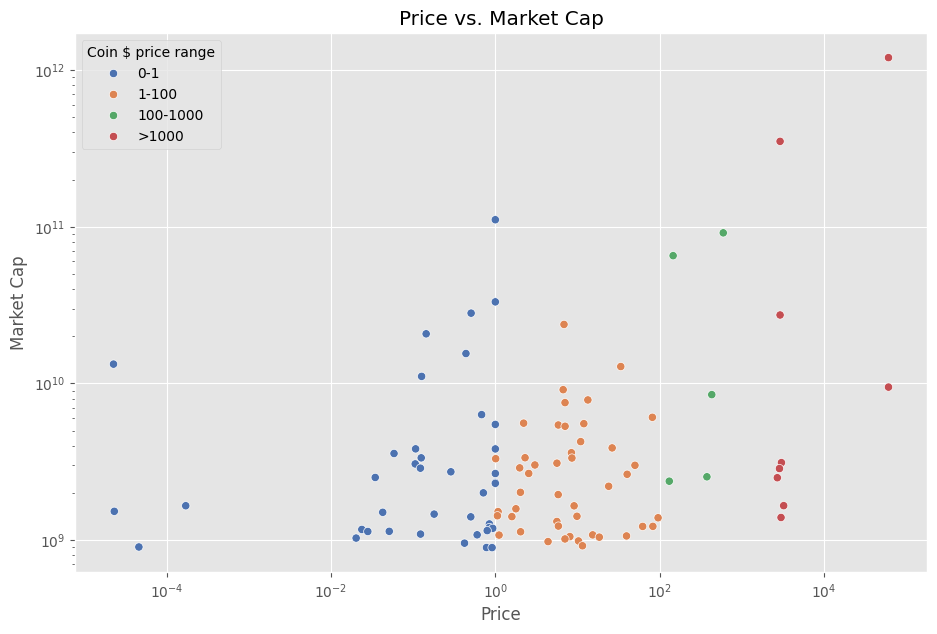

In [239]:
plot_data = data.copy()

prices = [0, 1, 100, 1000, np.inf]
prices_ranges = ['0-1', '1-100', '100-1000', '>1000']
plot_data['Coin $ price range'] = pd.cut(plot_data['Price'], bins = prices, labels = prices_ranges)

# Plotting
plt.figure(figsize=(11, 7))
sns.scatterplot(data= plot_data, x= 'Price', y= 'Market Cap', hue= 'Coin $ price range', palette= 'deep')

plt.xlabel('Price')
plt.ylabel('Market Cap')
plt.title('Price vs. Market Cap')
plt.legend(title='Coin $ price range')
plt.xscale('log')
plt.yscale('log')
plt.show()



### Histograms
Visualization of distributions of some of the data: 
- Histogram for the prices of coins
- Market cap histogram
- FDV histogram

Prices histogram


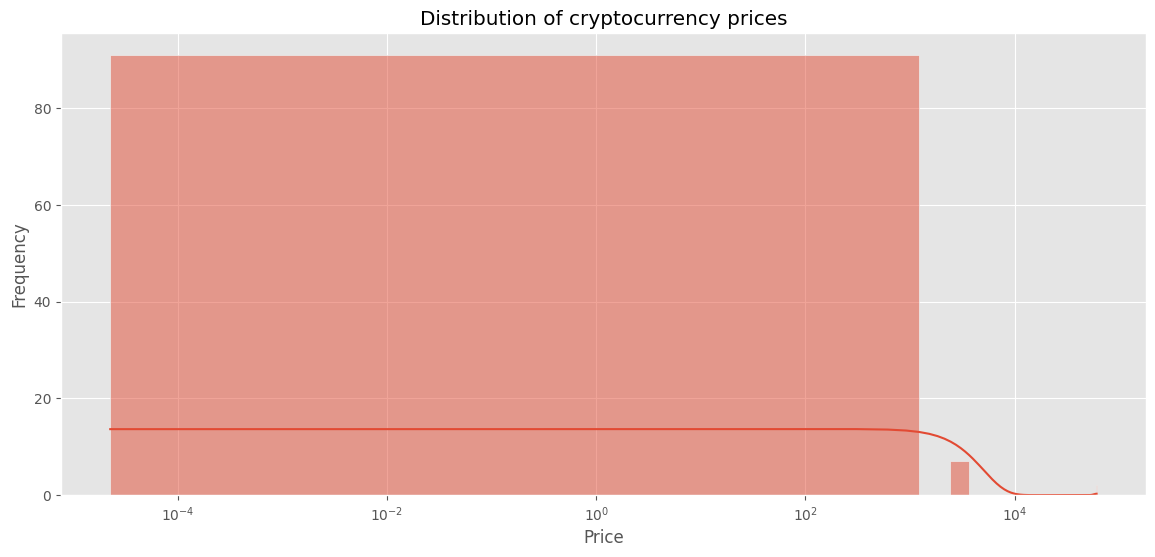


Market cap


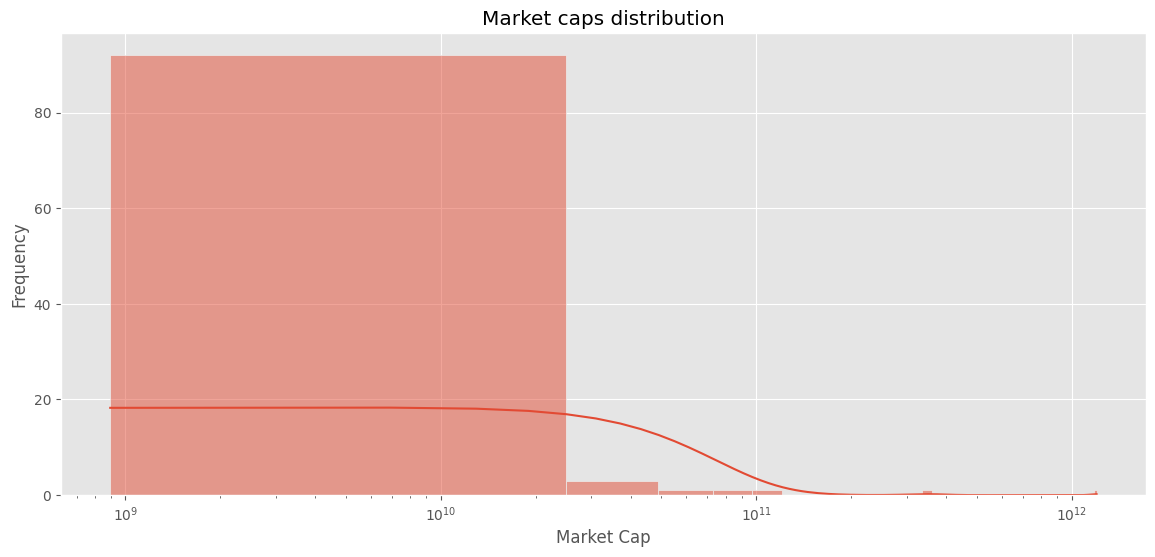


FDV distribution


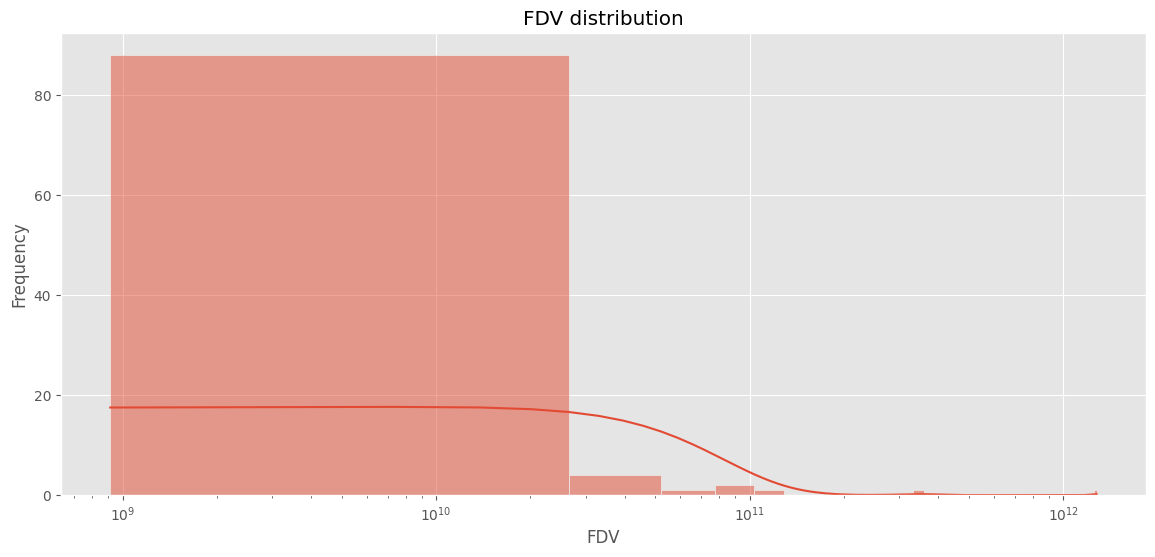

In [247]:
#price
print("Prices histogram")
plt.figure(figsize=(14, 6))
sns.histplot(data['Price'], bins=50, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of cryptocurrency prices')
plt.xscale('log')
plt.show()

#market cap
print("\nMarket cap")
plt.figure(figsize=(14, 6))
sns.histplot(data['Market Cap'], bins=50, kde=True)
plt.xlabel('Market Cap')
plt.ylabel('Frequency')
plt.title('Market caps distribution')
plt.xscale('log')
plt.show()

#FDV
print("\nFDV distribution")
plt.figure(figsize=(14, 6))
sns.histplot(data['FDV'], bins=50, kde=True)
plt.xlabel('FDV')
plt.ylabel('Frequency')
plt.title('FDV distribution')
plt.xscale('log')
plt.show() 


### Line plot of prices
Plots showcasing the crytpo prices divided into 3 categories according to their price range for better visualization

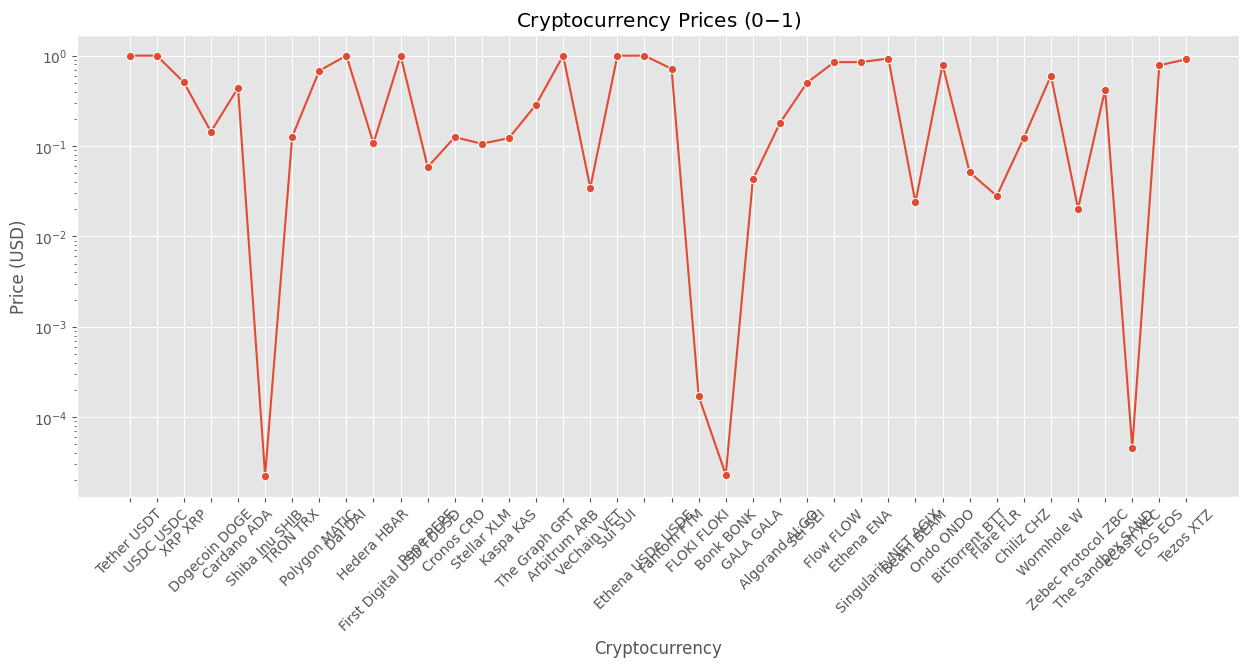

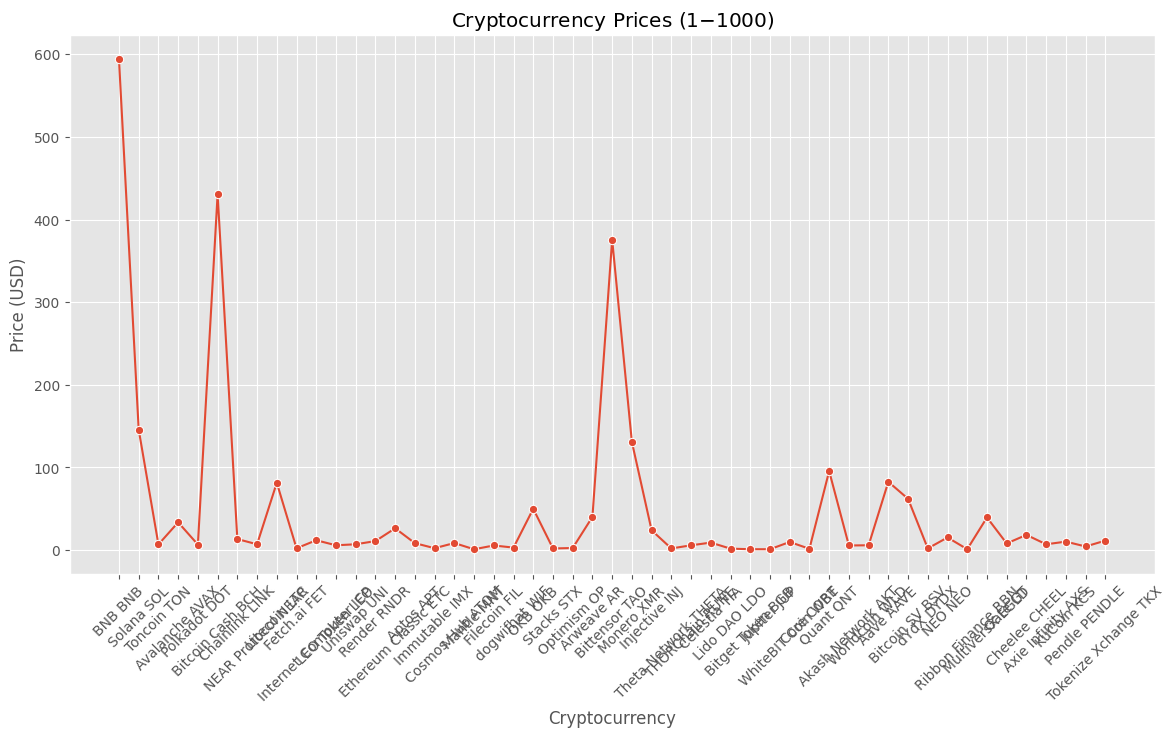

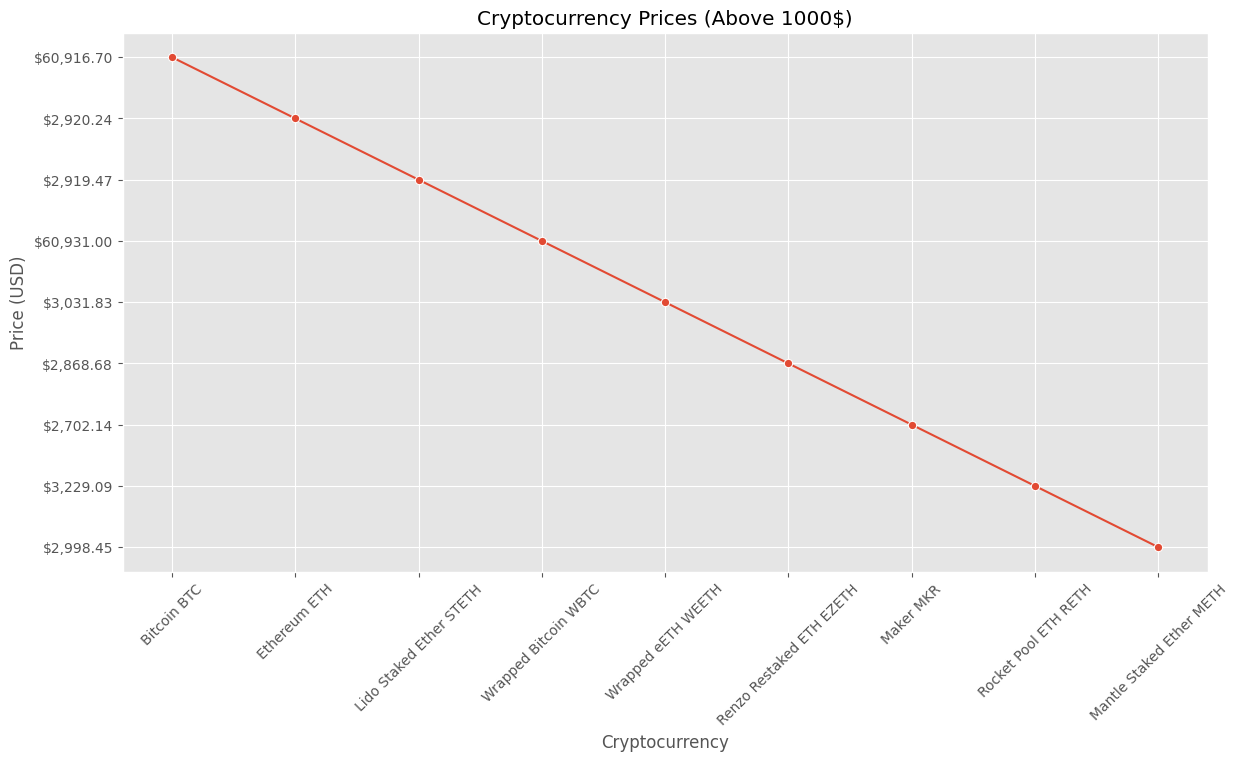

In [267]:
#categories
lowest_prices = data[data['Price'] <= 1]
mid_prices = data[(data['Price'] > 1) & (data['Price'] <= 1000)]
highest_prices = df_data[data['Price'] > 1000]

#coins below 1$
plt.figure(figsize = (15, 6))
sns.lineplot(data = lowest_prices, x='Coin', y='Price', marker='o')
plt.xticks(rotation =45)
plt.title('Cryptocurrency Prices (0$-1$)')
plt.xlabel('Cryptocurrency')
plt.ylabel('Price (USD)')
plt.show()

#coins between 1$ and 1000$
plt.figure(figsize=(14, 7))
sns.lineplot(data=mid_prices, x='Coin', y='Price', marker='o')
plt.xticks(rotation = 45)
plt.title('Cryptocurrency Prices (1$-1000$)')
plt.xlabel('Cryptocurrency')
plt.ylabel('Price (USD)')
plt.show()

#coins above 1000$
plt.figure(figsize = (14, 7))
sns.lineplot(data = highest_prices, x='Coin', y='Price', marker='o')
plt.xticks(rotation = 45)
plt.title('Cryptocurrency Prices (Above 1000$)')
plt.xlabel('Cryptocurrency')
plt.ylabel('Price (USD)')
plt.show()


In [271]:
price_sort = data.copy()
price_sort = price_sort.sort_values(by='Price',ascending=False)

price_sort

,Coin,Price,1h,24h,7d,30d,24h Volume,Market Cap,FDV,Market Cap / FDV
14,Wrapped Bitcoin WBTC,60931.000000,0.2%,0.4%,4.5%,13.4%,9.816427e+07,9.463085e+09,9.463085e+09,1.00
0,Bitcoin BTC,60916.700000,0.2%,0.4%,4.6%,13.6%,1.343762e+10,1.199174e+12,1.278499e+12,0.94
58,Rocket Pool ETH RETH,3229.090000,0.1%,0.6%,6.7%,16.7%,7.526232e+06,1.657392e+09,1.657392e+09,1.00
36,Wrapped eETH WEETH,3031.830000,0.1%,0.8%,6.4%,16.8%,1.382369e+07,3.119373e+09,3.119373e+09,1.00
70,Mantle Staked Ether METH,2998.450000,0.2%,0.5%,6.8%,16.7%,6.431185e+06,1.393003e+09,1.392964e+09,1.00
...,...,...,...,...,...,...,...,...,...,...
91,Zebec Protocol ZBC,0.020230,0.0%,5.6%,11.0%,29.5%,1.068268e+04,1.029367e+09,2.022739e+09,0.51
59,FLOKI FLOKI,0.000171,0.2%,1.7%,12.4%,11.9%,1.004217e+08,1.655396e+09,1.704714e+09,0.97
97,eCash XEC,0.000046,0.2%,0.2%,10.5%,35.6%,6.451779e+06,9.030885e+08,9.626571e+08,0.94
62,Bonk BONK,0.000023,0.4%,0.7%,17.4%,5.2%,1.150466e+08,1.525035e+09,2.151437e+09,0.71


### Percentage changes
Distribution plots for price changes depending on last hour and day (the percentage data currently has no separation between decrease and increase).

1h price change distribution:


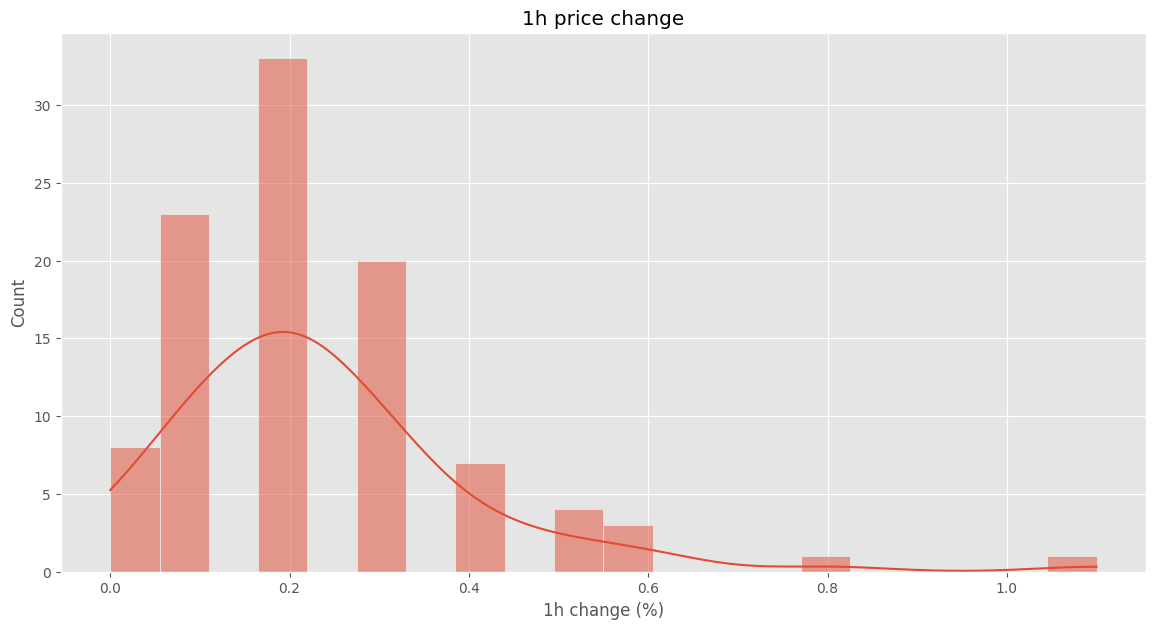


 24h price change distribution:


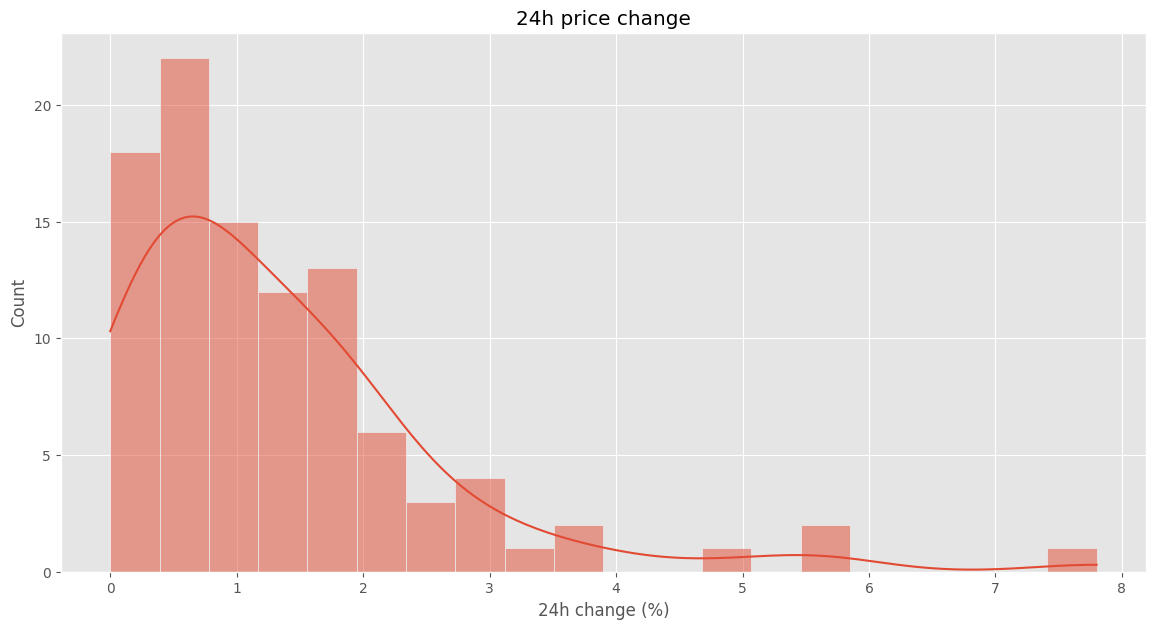

In [272]:
#Distribution plots/histograms for price changes depending on time
#the percentage data currently has no separation between decrease and increase
data_time = data.copy()
#changing string values to floats
data_time['1h'] = data_time['1h'].str.replace('%', '', regex=False).astype(float)
data_time['24h'] = data_time['24h'].str.replace('%', '', regex=False).astype(float)

print('1h price change distribution:')
plt.figure(figsize=(14, 7))
sns.histplot(data=data_time, x='1h', kde=True, bins=20)
plt.title('1h price change')
plt.xlabel('1h change (%)')
plt.show()


print('\n 24h price change distribution:')


plt.figure(figsize=(14, 7))
sns.histplot(data=data_time, x='24h', kde=True, bins=20)
plt.title('24h price change')
plt.xlabel('24h change (%)')
plt.show()


### Box Plots
Visualizing the percentage changes without categorizing them based on increase or decrease

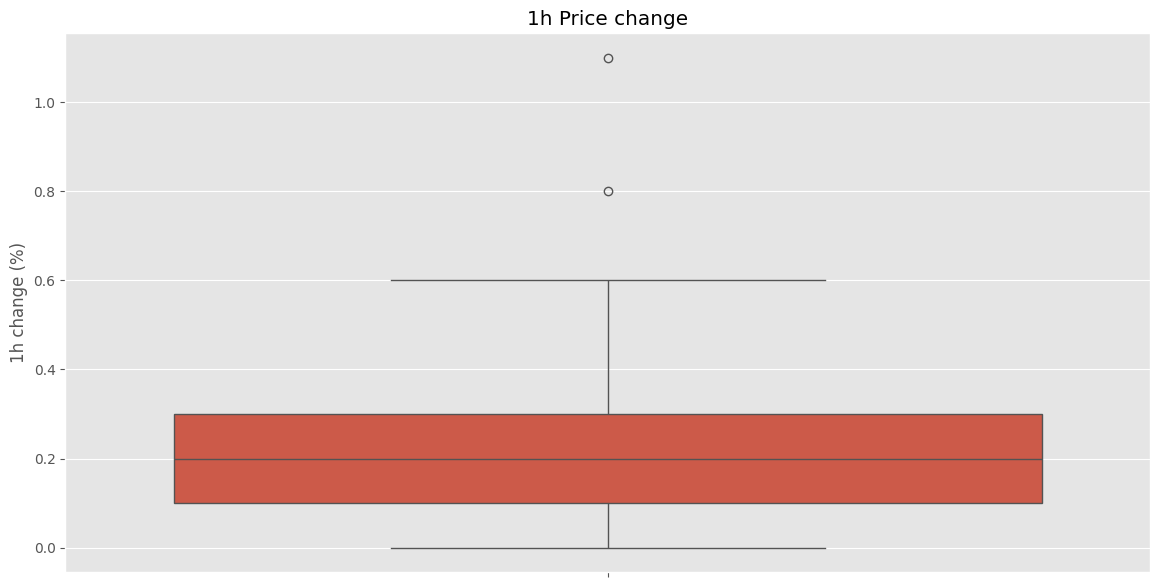

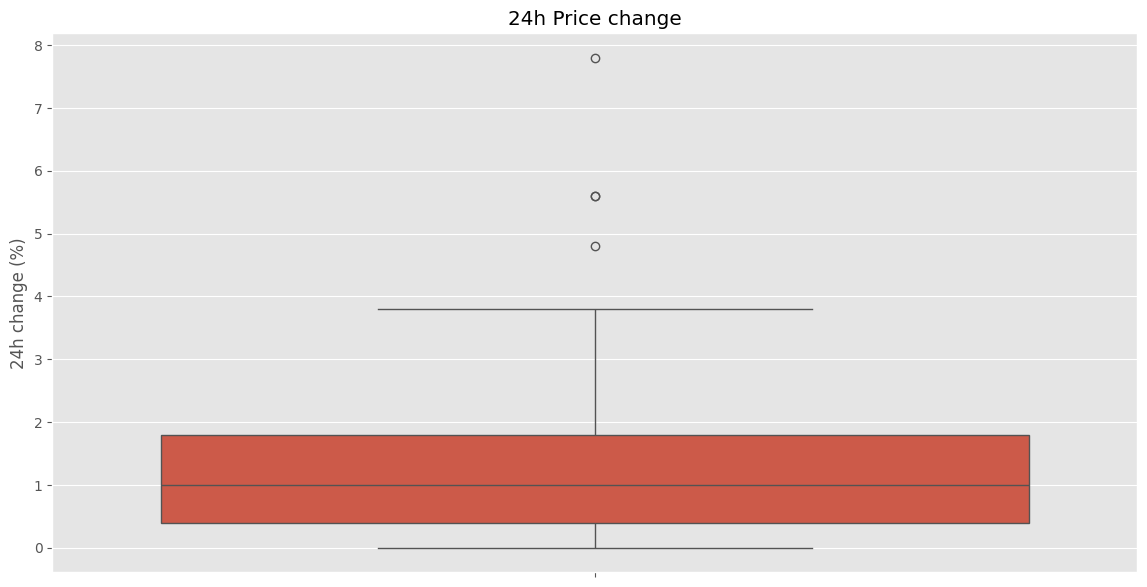

In [273]:
# Boxplot for 1h change
plt.figure(figsize=(14, 7))
sns.boxplot(data=data_time, y='1h')
plt.title('1h Price change')
plt.ylabel('1h change (%)')
plt.show()

# Boxplot for 24h change
plt.figure(figsize=(14, 7))
sns.boxplot(data=data_time, y='24h')
plt.title('24h Price change')
plt.ylabel('24h change (%)')
plt.show()